**Pregunta 1: Extracción de datos bursátiles de Tesla con yfinance**

In [6]:
!pip install yfinance

In [7]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Pregunta 2: Webscraping de ingresos de Tesla**

In [15]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# --- Obtener datos de ingresos de Tesla desde macrotrends.net ---
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

# Obtener y analizar HTML
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Seleccionar la tabla correcta (usualmente es la segunda, índice 1)
tesla_revenue = pd.read_html(StringIO(str(tables[1])))[0]

# Renombrar columnas
tesla_revenue.columns = ["Date", "Revenue"]

# Limpiar ingresos y convertir a numérico
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r'[$,]', '', regex=True).astype(float)

# Mostrar las últimas cinco filas como lo pide la tarea
tesla_revenue.tail()

,Date,Revenue
58,2010-06-30,28.0
59,2010-03-31,21.0
60,2009-12-31,NaN
61,2009-09-30,46.0
62,2009-06-30,27.0


**Pregunta 3: Extracción de datos bursátiles de GameStop con yfinance**

In [10]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Pregunta 4: Webscraping de ingresos de GameStop**

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {
    "User-Agent": "Mozilla/5.0"
}

html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
print("Cantidad de tablas encontradas:", len(tables))

for i, t in enumerate(tables):
    try:
        df = pd.read_html(StringIO(str(t)))[0]
        print(f"\n▶ Tabla #{i} - Primeras filas:")
        print(df.head(2))
    except:
        print(f"❌ No se pudo leer la tabla #{i}")

gme_revenue = pd.read_html(StringIO(str(tables[1])))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.tail()

Cantidad de tablas encontradas: 6

▶ Tabla #0 - Primeras filas:
   GameStop Annual Revenue (Millions of US $)  \
0                                        2025   
1                                        2024   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $3,823  
1                                       $5,273  

▶ Tabla #1 - Primeras filas:
  GameStop Quarterly Revenue (Millions of US $)  \
0                                    2025-01-31   
1                                    2024-10-31   

  GameStop Quarterly Revenue (Millions of US $).1  
0                                          $1,283  
1                                            $860  

▶ Tabla #2 - Primeras filas:
                                              Sector  \
0                             Consumer Discretionary   
1  GameStop Corp. offers the best selection of ne...   

                                            Industry  \
0                                             

,Date,Revenue
60,2010-01-31,"$3,524"
61,2009-10-31,"$1,835"
62,2009-07-31,"$1,739"
63,2009-04-30,"$1,981"
64,2009-01-31,"$3,492"


**Pregunta 5: Gráfico de acciones e ingresos de Tesla**

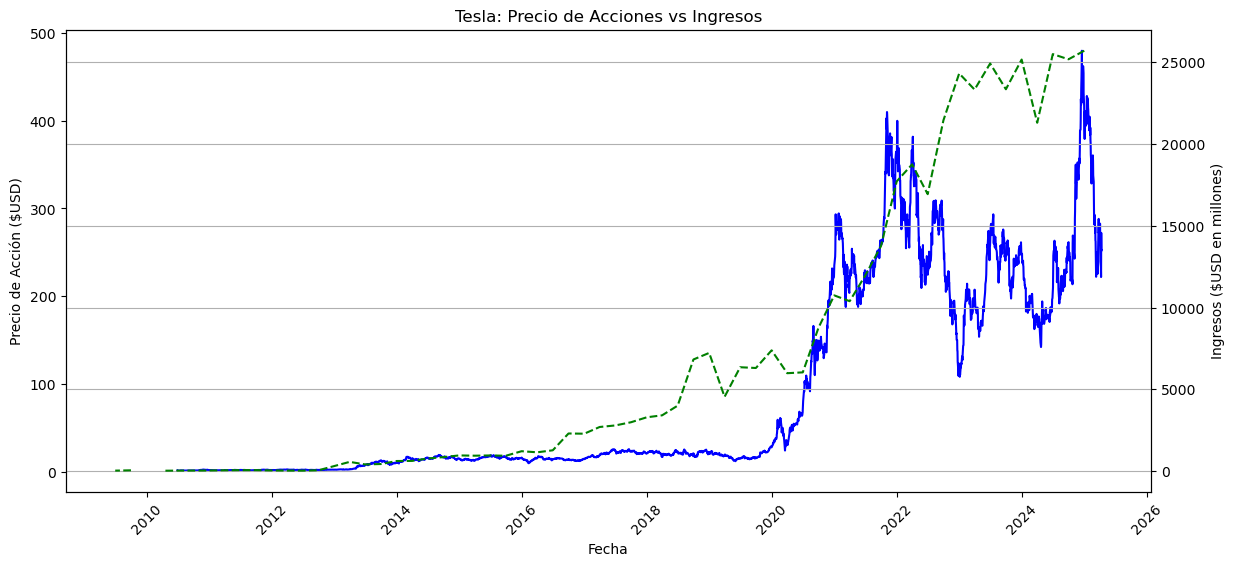

In [5]:
# 📦 Librerías
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import matplotlib.pyplot as plt
from io import StringIO

# 📊 Descargar datos de acciones
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data["Date"] = pd.to_datetime(tesla_data["Date"])  # ← convertir a datetime

# 🌐 Web scraping para ingresos de Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

tesla_revenue = pd.read_html(StringIO(str(tables[1])))[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r'[$,]', '', regex=True).astype(float)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])  # ← convertir a datetime

# 📈 Función para graficar
def make_graph(stock_data, revenue_data, stock, color='blue'):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data["Date"], stock_data["Close"], label="Precio de Acciones", color=color)
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio de Acción ($USD)")
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_title(f"{stock}: Precio de Acciones vs Ingresos")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], label="Ingresos", color="green", linestyle="dashed")
    ax2.set_ylabel("Ingresos ($USD en millones)")

    plt.grid()
    plt.show()

# ✅ Ejecutar gráfico
make_graph(tesla_data, tesla_revenue, "Tesla")

**Pregunta 6: Gráfico de acciones e ingresos de GameStop**

Tablas encontradas: 6


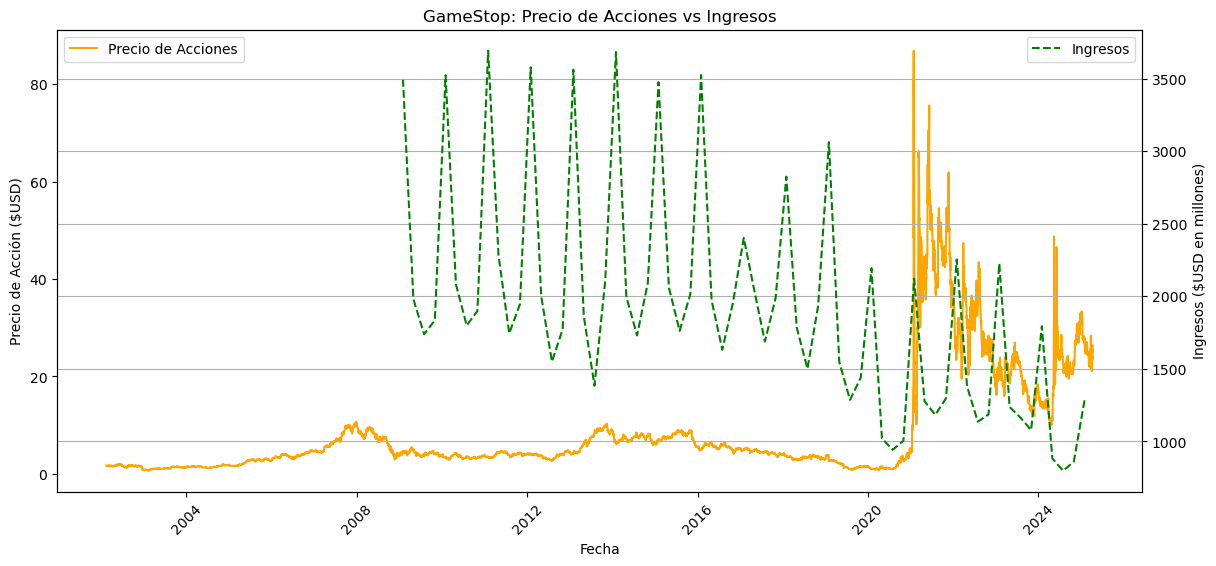

In [13]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from io import StringIO

# --- Get GME stock data ---
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data["Date"] = pd.to_datetime(gme_data["Date"])

# --- Get GME revenue data from macrotrends ---
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

# Buscar todas las tablas
tables = soup.find_all("table")
print("Tablas encontradas:", len(tables))  # Diagnóstico

# Elegir tabla 1 (ajustar si es necesario)
gme_revenue = pd.read_html(StringIO(str(tables[1])))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r'[$,]', '', regex=True).astype(float)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

# --- Gráfico de acciones vs ingresos ---
def make_graph(stock_data, revenue_data, stock, color='orange'):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data["Date"], stock_data["Close"], label="Precio de Acciones", color=color)
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio de Acción ($USD)")
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_title(f"{stock}: Precio de Acciones vs Ingresos")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], label="Ingresos", color="green", linestyle="dashed")
    ax2.set_ylabel("Ingresos ($USD en millones)")

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.grid()
    plt.show()

make_graph(gme_data, gme_revenue, "GameStop")